<div style="float:left">
    <h1 style="width:450px">Practical 5: Numeric Data</h1>
    <h2 style="width:450px">Easing into EDA with Pandas</h2>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>: You should download this notebook from GitHub and then save it to your own copy of the repository. I'd suggest adding it (<tt>git add Practical-...</tt>) right away and then committing (<tt>git commit -m "Some message"</tt>). Do this again at the end of the class and you'll have a record of everything you did, then you can <tt>git push</tt> it to GitHub.</div>

# Run at the start of any code with Pandas for graphs

In [ ]:
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

## You've Already Invented Pandas!

You might be feeling a little intimidated by `pandas`, but here's the thing: we came close to writing something like pandas from scratch. That's because pandas takes a column-view of data in the same way that our Dictionary-of-Lists did, it's just that it's got a lot more features than our 'simple' tool does. That's why the documentation is so much more forbidding and why pandas is so much more powerful.

But at its heart, a pandas `DataFrame` (`df` for short) is a collection of `Data Series` objects (i.e. columns) with an index. Each Series is like one of our column-lists from the last notebook. And the `df` is like the dictionary-of-lists that held the data together. You've seen this before, so you already _know_ what's going on... or at least you now have an _analogy_ that you can use to make sense of pandas:
```python
myDataFrame = {
    '<column name 1>': <Series 1>,
    '<column name 2>': <Series 2>,
    '<column name 3>': <Series 3>
}
``` 

## The Importance of Data Exploration

After a few weeks getting to grips with Python, we're now going to start working with some real data. One of the first things that we do when working with any new data set is to familiarise ourselves with it. There are a _huge_ number of ways to do this, but there are no shortcuts to:

1. Reading about the data (how it was collected, what the sample size was, etc.)
2. Reviewing any accompanying metadata (data about the data, column specs, etc.)
3. Looking at the data itself at the row- and column-levels
4. Producing descriptive statistics
5. Visualising the data using plots

You should use _all_ of these together to really understand where the data came from, how it was handled, and whether there are gaps or other problems. If you're wondering which comes first, the concept of _start with a chart_ is always good... though we've obviously not _quite_ gotten there yet! This week we want you to get a handle on pandas itself, so although we will do some plotting of charts, we'll focus on 3-4 with a tiny bit of 5. There will be much more on plotting charts next week, and you should be looking into 1 and 2 yourself based on what's been written both on the [Inside Airbnb web site](http://insideairbnb.com/about.html) and in the [suggested readings](https://github.com/jreades/i2p/blob/master/bib/Bibliography.md).

So although they don't need to be done now, you probably want to add both those links to your reading list!

## Task 1: Reading and Writing Data

We're going to start with reading a remote file and saving a local copy. You probably want to download the [Live Coding session](https://www.dropbox.com/sh/lt8zyuaukvuh4u5/AAB03BAPv5ygziJwKxMKDfD0a?dl=0) for reference here.

### Task 1.1: Read Remote Data

You will need to do several things here to read the remote, compressed CSV file specified by `url` into a data frame called `df`. Setting `low_memory=False` ensures that pandas will try to load the entire data set _before_ guessing the data format! Obviously, with very large files this is probably a bad idea and it's possible to force a particular column type while readng in the data as well. For larger data sets there are platforms like [Dask](https://dask.org/) (see, eg, [this](https://towardsdatascience.com/why-and-how-to-use-dask-with-big-data-746e34dac7c3)), and beyond that are [other options](https://towardsdatascience.com/scaling-pandas-comparing-dask-ray-modin-vaex-and-rapids-c74c85a4e59c).

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>: As in other practicals, I've deliberately removed some lines/bits of code and replaced them with <tt>??</tt>.</div>

In [71]:
# Set download URL
# You may want to check that this shows you 'raw' data if you
# get errors about the first line being HTML!
url = 'https://github.com/jreades/i2p/raw/master/data/src/2020-08-24-listings.csv.gz'

# your code here
import pandas as pd
df = pd.read_csv(url, compression='gzip', low_memory=False)

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 74,188 x 74


You should get: "Data frame is 74,188 x 74".

### Task 1.2: Describing the Data Frame

Let's get a general sense of the data by printing out the _information_ about the data frame:

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 74 columns):
id                                              74186 non-null float64
listing_url                                     74187 non-null object
scrape_id                                       74187 non-null object
last_scraped                                    74187 non-null object
name                                            74167 non-null object
description                                     71329 non-null object
neighborhood_overview                           47208 non-null object
picture_url                                     74188 non-null object
host_id                                         74188 non-null float64
host_url                                        74188 non-null object
host_name                                       74179 non-null object
host_since                                      74179 non-null object
host_location                                   7

You should get that the data frame uses 41.9MB of memory and has 34 float64 columns, and 40 object columns.

Finally, it's useful to have a list of the columns without all of the details shown above. Print the columns _as a list_:

In [73]:
print(list(df.columns.values))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

If you get `Index(['id', 'listing_url',...], dtype='object')` then you have printed the column _index_, not the columns as a list.

### Task 1.3: Saving the File Locally

Now save the file somewhere local so that you don't have to keep downloading 40MB of compressed data every time you want to start the practical. We'll be using this data for the rest of term, so you might as well save yourself some time and bandwidth! We'll talk more about data processing pipelines over the course of the term, but I'd suggest putting this data set into a `data/raw` folder because then you can have directories like `data/clean` and `data/analytical` as you move through the process of cleaning and prepping your data for analysis.

In [74]:
pwd

'/Users/sophieayling/Documents/GitHub/i2p/practicals'

In [75]:
import os
path = os.path.join('../data/raw') # A default location to save raw data
fn   = url.split('/')[-1]         # What does this do?
print(f"Writing to: {fn}")

Writing to: 2020-08-24-listings.csv.gz


In [76]:
if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")   # nice, so it copied the compressed folder to the raw folder

Done.


### Task 1.4: Resetting & Reloading the DataFrame

Let's re-load the data now just to make sure we're working with the local data set, and also restrict the number of rows and columns that we load. We got `cols` by copying the output of `list(df.columns.values)` and then removing the fields that we _weren't_ interested in.

In [77]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

We use `del(df)` to ensure that we aren't accidentally using the 'old' data frame: after deleting it from Python's memory to free up space, we will read in a new data frame. See if you can set pandas to:
- Use the columns specified in `cols`
- Load only the first 10,000 rows using `nrows`
- Don't forget to set `low_memory=False`

In [78]:
del(df)
df = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols, nrows=10000)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 10,000 x 42


You should get `Data frame is 10,000 x 42`.

In [79]:
df.sample(6, random_state=42)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
6252,5611338.0,https://www.airbnb.com/rooms/5611338,2020-08-27,Lovely Flat close to Tower Bridge!,"´The flat is very spacious (1 bedroom, living ...",29021331.0,Sandra,2015-03-09,"Madrid, Community of Madrid, Spain","Hi! \r\n\r\nWe are Sandra and Pablo, a couple ...",...,2017-11-05,96.0,10.0,10.0,10.0,10.0,NaN,f,1.0,0.54
4684,4176912.0,https://www.airbnb.com/rooms/4176912,2020-08-26,B&B Smart Charming 2bed 6 Sleeper,<b>The space</b><br />PLEASE KINDLY ASK FOR AV...,1517803.0,Hilmi,2011-12-19,"London, United Kingdom",I am a young professional with an engineer bac...,...,2015-04-02,73.0,9.0,9.0,9.0,8.0,NaN,f,24.0,0.04
1731,1041523.0,https://www.airbnb.com/rooms/1041523,2020-08-26,Beautifully Spacious Property in Islington,This beautiful 1 bedroom property sits in the ...,5733781.0,Tomas,2013-04-02,London,I'm from London and like to travel,...,2020-01-21,95.0,10.0,10.0,9.0,10.0,NaN,f,1.0,0.73
4742,4225126.0,https://www.airbnb.com/rooms/4225126,2020-08-26,Lovely room on Shoreditch Park,A nice room in East London on Regents Canal an...,13740059.0,Eric,2014-03-31,"New York, New York, United States",World traveler extraordinaire,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN
4521,4012401.0,https://www.airbnb.com/rooms/4012401,2020-08-26,BIG Double ROOM +LIVINGROOM + GARDEN @ CAMDEN ...,Spacious double room in camden town with your...,20298323.0,James,2014-08-20,LONDON,French physiotherapist living in the heart of ...,...,2020-07-20,90.0,9.0,10.0,10.0,10.0,NaN,t,2.0,1.39
6340,5711398.0,https://www.airbnb.com/rooms/5711398,2020-08-26,Master Bedroom in a Converted Pub,"We live an a beautifully converted pub, right ...",11021500.0,Toby,2014-01-04,"London, England","I'm lively, easygoing and a little bit geeky. ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,NaN


Because we have set the `random_state`, you _should_ get the same sample every time you run this code (just change random state to some other value and re-run _that_ to see this in action). If you look very closely, you'll see that pandas isn't showing you the _full_ range of columns since there are 42! If you'd like to only look at specific columns then you can specify them after the sample method call using what looks like a nested list: `[[<column names as strings>]]`.

In [80]:
df.sample(6, random_state=42)[['id', 'price', 'room_type', 'host_location', 'last_review', 'review_scores_rating', 'license']]

,id,price,room_type,host_location,last_review,review_scores_rating,license
6252,5611338.0,$95.00,Entire home/apt,"Madrid, Community of Madrid, Spain",2017-11-05,96.0,NaN
4684,4176912.0,$220.00,Entire home/apt,"London, United Kingdom",2015-04-02,73.0,NaN
1731,1041523.0,$85.00,Entire home/apt,London,2020-01-21,95.0,NaN
4742,4225126.0,$95.00,Private room,"New York, New York, United States",NaN,NaN,NaN
4521,4012401.0,$30.00,Private room,LONDON,2020-07-20,90.0,NaN
6340,5711398.0,$60.00,Private room,"London, England",NaN,NaN,NaN


## Task 2. Dealing with NaNs and Nulls

If you look at the sample, you should see that a number of data types that aren't 'right' for their contents: the id columns are floats; the dates aren't dates; there's a boolean that's not a boolean... It would be nice to fix these! 

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>: I had intended to ask you to fix these by combining code from previous weeks with information provided in the lecture, but it turns out that the InsideAirbnb data set is <i>dirty</i>. There are a lot of <tt>NaN</tt> values and some of these are <i>deeply</i> problematic for some of the column types in pandas. There are also a number of challenges with other columns so, instead, I've opted to show you how I would clean this data as a <i>first pass</i> to get it into a format where it's tractable for further cleaning.</div>

### Task 2.1 Identifying Problem Rows

The reason I'm not asking you to do this part yourselves is that it took me nearly an hour just to work out why I couldn't convert some of the columns to the right data types; then I started finding rows like these:

In [81]:
df.iloc[3558:3561,:]

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,license,instant_bookable,calculated_host_listings_count,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,4968944.0,Alejandra,2013-02-04,"London, United Kingdom",Alejandra Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3559,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"London, United Kingdom",...,0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3560,3140773.0,https://www.airbnb.com/rooms/3140773,2020-08-26,One bed flat set on Victoria Park,Home away from home. New build one bed flat on...,15947403.0,Mary,2014-05-25,"London, United Kingdom",NaN,...,2017-05-10,100.00,10.0,10.0,10.0,10.0,NaN,f,1.0,0.02


Notice that the row with index value `3559` is clearly _wrong_: if I had to guess, I'd say that it's some kind of partial extract/write process because there _are_ elements in there that look right but they are obviously in the wrong columns. So we can _probably_ drop some of these rows, but one thing to do is look at the frequency of NaNs across the data frame _first_. So we need to look for NaNs and Nulls, but it's quite obvious that a `NaN` in the listing id is a basic problem and we should [drop these](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/).

In [82]:
df[df.id.isna()][['id','listing_url','name','description','host_id','host_name']]

,id,listing_url,name,description,host_id,host_name
3559,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern..."


This shows that only one row in the 10,000 row sub-sample has a NaN for its id.

As always, if you don't know that's going on, break it down:

- You have seen how `[[<column names>]]` works, so that's just selecting the columns that we want to show.
- You know how `df[<selection criteria>]` works, so that isn't anything really new either!
- So the only really new part is `df.id.isna()`: `df.id` is the `id` column (we could have written this `df['id']` if we wanted) and `isna()` is a test for whether or not a value is NaN. 

If you're not sure what the next line does, try breaking it down by running the inner bits before you run the `drop` command; and also try looking online for examples of how to use `df.drop` (e.g. just up above):

In [83]:
df.drop(df[df.id.isna()].index.values, axis=0, inplace=True)

With that really troublesome data out of the way, you can now turn to [counting NaNs or Nulls](https://www.delftstack.com/howto/python-pandas/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/#df.isnull.sum-method-to-count-nan-occurrences) in the remaining data with a view to identifying other rows that can probably be dropped.

### Task 2.2: Counting Nulls by Column

As a starting point I would look to drop the columns that contain only NaNs. Remember that we've dropped a row from the data frame)! Notice how this next command works:
```python
# returns a data frame with all values set to True/False according to Null status
df.isnull() 
# counts these values by column (we'll see another option in a moment)
df.isnull.sum(axis=0) 
# Sort results in descending order
df.isnull.sum(axis=0).sort_values(ascending=False) 
```

In [84]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]  
# the method (.isnull().sum()) is counting null occurrences

bathrooms                      9999
license                        9999
host_response_rate             5990
host_acceptance_rate           4194
host_about                     2489
review_scores_checkin          1933
review_scores_location         1929
review_scores_cleanliness      1928
review_scores_communication    1925
review_scores_rating           1913
reviews_per_month              1811
last_review                    1811
dtype: int64

The most obvious ones here are:
```
bathrooms                         9999
license                           9999
host_response_rate                5990
host_acceptance_rate              4194
host_about                        2489
```

In [85]:
df.drop(columns=['bathrooms','license', 'host_response_rate', 'host_acceptance_rate', 'host_about'], inplace=True)

Because we have dropped everything `inplace` the code simply runs and doesn't return anything.

In [86]:
df.info()   
#bathrooms, license and other fields no longer there, compared to earlier df.info)()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 37 columns):
id                                9999 non-null float64
listing_url                       9999 non-null object
last_scraped                      9999 non-null object
name                              9990 non-null object
description                       9986 non-null object
host_id                           9999 non-null float64
host_name                         9994 non-null object
host_since                        9994 non-null object
host_location                     9992 non-null object
host_is_superhost                 9993 non-null object
host_listings_count               9993 non-null float64
host_total_listings_count         9993 non-null object
host_verifications                9998 non-null object
latitude                          9998 non-null float64
longitude                         9998 non-null float64
property_type                     9998 non-null object
room_typ

### Task 2.3: Counting Nulls by Row

We now know that there _are_ still quite a few problems, but we do still need a way to identify the rows that are causing most of the problems.

Notice that changing the axis changes the 'direction' of the `sum` from columns to rows. And we are getting back a data series because the summing operation reduces it to just one column.

In [87]:
df.isnull().sum(axis=1).sort_values(ascending=False)  
# the axis=1 is taking row totals, rather than axis=0 as column totals
# the output below is showing the data # column (index value) and the number of missings 'nulls' - referred to as 'NaNs' in that row

3558    28
8015    14
9767    14
8052    14
8992    14
        ..
6146     0
6147     0
6148     0
6150     0
0        0
Length: 9999, dtype: int64

So that is a Series showing how many NaN values there are by index value. You should see something like:
```
3558    28
8015    14
9767    14
8052    14
8992    14
```
If we save the results to a variable called `probs` (i.e. problems) then we can decide what to do next.

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>: there's a chance that Python will complain why you try to run the third line of code. This is particularly likely if you are using Anaconda Python directly (i.e. not Docker or Vagrant). In that case you need to add the code listed at the start of Task 5.</div>

<class 'pandas.core.series.Series'>


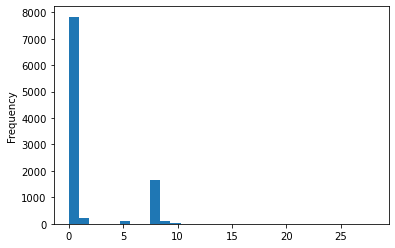

In [88]:
probs = df.isnull().sum(axis=1) # 'probs' is referring to problems not probabilities
print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # this plot is showing the frequency of problems by index value 

Looking at this histogram, these look like two groups in the data so I would start there. I would take values greater than about 7 as being ones that are most likely be problematic. We can use the index from `probs` to select out the rows we want to inspect from the main data frame.

Here's another bit of code that bears unpacking:
1. `probs > 7`: this selects only those rows in the 'probs' series whose value is greater than 7
2. `probs[...].index` returns the index values from the Series, which we will then pass to the `drop` command.
3. `df.drop(..., inplace=True)` will then drop the rows selected by `probs[probs>7].index`.

In [89]:
df.drop(probs[probs > 7].index, inplace=True)

In [90]:
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")

Have reduced data frame to: 8188 rows and 37 columns


## Task 3. Fixing the Remaining Data Issues

If you want to challenge yourself, then I'd suggest trying to work out how to adapt what we saw in previous weeks using the `dtype` dict to map column names to column types; however, a more straightforward way to do this is to create different for loops for each:

### Task 3.1: Boolean Values

Let's start with columns that are likely to be boolean:

In [91]:
bools = ['instant_bookable','host_is_superhost']  # booleans are binary (they are yet to be classified as booleans, we are about to do that)
df.sample(5, random_state=43)[bools] # it's just taking a random sample of these vars to show us 

,instant_bookable,host_is_superhost
4993,t,t
9740,f,f
8730,t,f
421,t,f
2225,t,t


Here we have to `map` 't' to True and 'f' to False _before_ converting the column to a boolean type. If you simply tried to replace them with the strings 'True' and 'False', then the conversion would run into the same problem as Week 3: any string that is not `None` will convert a True boolean.

In [92]:
# This approach requires us to map 't' and 'f'
# to 'True' and 'False'
map = {'t':True, 'f':False}  
# so here, it's taking the values of instant_bookable and host_is_superhost as defined as 'bools' above and defining t as True and f as False
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace(map).astype('bool')
# here it's converting each of the values (now they are mapped to true or false, to booleans)

Converting instant_bookable
Converting host_is_superhost


In [93]:
df.sample(5, random_state=43)[bools]

,instant_bookable,host_is_superhost
4993,True,True
9740,False,False
8730,True,False
421,True,False
2225,True,True


### Task 3.2: Dates

I've found dates to be particularly challenging, though pandas has _tried_ to make this process less painful than before using the `infer_datetime_format` option. What was particularly frustrating is that row 3559 had the value `t` in _one_ of the datetime columns and this caused the type conversion to fail but was unclear about where this was happening. I eventually worked it out by trying to convert _parts_ of each series in the data frame to datetime until I had a block that failed. I then knew that I could narrow this down using integer location indexing.

In [94]:
dates = ['last_scraped','host_since','first_review','last_review'] 
# just displaying all the columns that would seem to have date-time values
df.sample(5, random_state=43)[dates]

,last_scraped,host_since,first_review,last_review
4993,2020-08-26,2013-11-30,2014-12-21,2020-03-01
9740,2020-08-26,2015-04-12,2015-09-05,2015-09-05
8730,2020-08-26,2015-07-04,2015-07-31,2020-03-15
421,2020-08-27,2012-02-27,2016-02-15,2020-03-14
2225,2020-08-26,2013-04-24,2013-09-19,2020-06-03


In [95]:
for d in dates:
    print("Converting " + d)
    df[d] = pd.to_datetime(df[d], infer_datetime_format=True)
    
# for each value in the dates columns (variables indicated above), print that the conversion is happening 
# then converting each of the values to datetime format 

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [96]:
df.sample(5, random_state=43)[dates]

,last_scraped,host_since,first_review,last_review
4993,2020-08-26,2013-11-30,2014-12-21,2020-03-01
9740,2020-08-26,2015-04-12,2015-09-05,2015-09-05
8730,2020-08-26,2015-07-04,2015-07-31,2020-03-15
421,2020-08-27,2012-02-27,2016-02-15,2020-03-14
2225,2020-08-26,2013-04-24,2013-09-19,2020-06-03


Of course, it's not actually clear there what has changed! But if you dig a little more deeply:

In [97]:
print(df[dates[0]].dtype)  # here it's showing that the format (type of these variables have changed)
df.sample(5, random_state=43)[dates[0]].dt.strftime('%d/%m/%y')
# Try some other columns and other formats!

df.info()
df.head(3)

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8188 entries, 0 to 9999
Data columns (total 37 columns):
id                                8188 non-null float64
listing_url                       8188 non-null object
last_scraped                      8188 non-null datetime64[ns]
name                              8187 non-null object
description                       8183 non-null object
host_id                           8188 non-null float64
host_name                         8188 non-null object
host_since                        8188 non-null datetime64[ns]
host_location                     8188 non-null object
host_is_superhost                 8188 non-null bool
host_listings_count               8188 non-null float64
host_total_listings_count         8188 non-null object
host_verifications                8188 non-null object
latitude                          8188 non-null float64
longitude                         8188 non-null float64
property_type                     

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
0,11551.0,https://www.airbnb.com/rooms/11551,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,43039.0,Adriano,2009-10-03,"London, England, United Kingdom",False,...,2010-03-21,2020-03-26,91.0,9.0,10.0,10.0,9.0,True,2.0,1.51
1,13913.0,https://www.airbnb.com/rooms/13913,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730.0,Alina,2009-11-16,"London, England, United Kingdom",False,...,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,9.0,False,3.0,0.17
2,15400.0,https://www.airbnb.com/rooms/15400,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302.0,Philippa,2009-12-05,"Kensington, England, United Kingdom",False,...,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,True,1.0,0.68


In [98]:
# I could convert the id number, and host id, listing count to an integer (as it doesn't have a decimal)
integers = ['id', 'host_id', 'calculated_host_listings_count']
for i in integers:
    print ("converting " + i)
    df[i] = df[i].astype(int)
    
#check if it worked
df.head(3)

# I could convert price to a float if I removed the dollar signs 
# I could convert the names from object to string (could not do but note that the no. characters of the string needs to be specified from the object )
# https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe


converting id
converting host_id
converting calculated_host_listings_count


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,43039,Adriano,2009-10-03,"London, England, United Kingdom",False,...,2010-03-21,2020-03-26,91.0,9.0,10.0,10.0,9.0,True,2,1.51
1,13913,https://www.airbnb.com/rooms/13913,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730,Alina,2009-11-16,"London, England, United Kingdom",False,...,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,9.0,False,3,0.17
2,15400,https://www.airbnb.com/rooms/15400,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom",False,...,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,True,1,0.68


In that line of code we:
- Took a random sample (setting the state to 43)
- Took the first column from the dates list (`dates[0]`)
- Used the _date_ accessor 
- And called `string format time` with the format `%d/%m/%y`

### Task 3.3: Categories

We know that these are likely to be categories because there'd be no other way to allow users to effectively search Airbnb

In [99]:
cats = ['property_type','room_type']
df.sample(5, random_state=43)[cats]

,property_type,room_type
4993,Entire apartment,Entire home/apt
9740,Private room in apartment,Private room
8730,Private room in apartment,Private room
421,Private room in townhouse,Private room
2225,Entire apartment,Entire home/apt


This next piece of code is quite useful for grouping and counting operations: we are counting the occurences of each unique value in part particular column or combination of columns:

In [100]:
df[cats[0]].value_counts()   
# the code is counting the number of values for each category i.e. stata tab equivalent for property type (becasue that is in position 0)


Entire apartment                      3460
Private room in apartment             1942
Private room in house                 1258
Entire house                           575
Private room in townhouse              301
Entire townhouse                       163
Entire loft                             79
Private room in bed and breakfast       66
Private room in loft                    51
Entire condominium                      44
Private room in condominium             43
Entire serviced apartment               19
Room in serviced apartment              19
Entire guest suite                      19
Private room in guest suite             17
Shared room in apartment                17
Room in boutique hotel                  16
Private room                            13
Entire guesthouse                       10
Shared room in house                     8
Private room in guesthouse               8
Room in bed and breakfast                7
Shared room in bed and breakfast         6
Boat       

In [101]:
df.host_is_superhost.value_counts()  # doing it for just one variable

False    6127
True     2061
Name: host_is_superhost, dtype: int64

In [102]:
df[cats[1]].value_counts()  # this is just counting the room type column because it's the second one (i.e. not 0)

Entire home/apt    4391
Private room       3729
Shared room          40
Hotel room           28
Name: room_type, dtype: int64

<div style="border: dotted 1px green; padding: 10px; margin: 5px; background-color: rgb(249,255,249);"><i>Hint</i>: one column has <i>many</i> different values (including Campers/RVs and Yurts!), the other has just four. If I were looking to conduct research I'd probably <i>start</i> with the <tt>room_type</tt> column since I may not care about hotels and therefore never even need to decide whether I care about boutique ones!</div>

In [104]:
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [105]:
print(df[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [106]:
df.sample(5, random_state=43)[cats]

,property_type,room_type
4993,Entire apartment,Entire home/apt
9740,Private room in apartment,Private room
8730,Private room in apartment,Private room
421,Private room in townhouse,Private room
2225,Entire apartment,Entire home/apt


### Task 3.4: Dealing with Strings

We'll have to put some more work into deal with the description and other more free-from text fields later in the term, but for now let's just deal with a straightforward one: price!

In [107]:
money = ['price']
df.sample(5, random_state=42)[money]

,price
2474,$94.00
4945,$59.00
5753,$33.00
7998,$150.00
1610,$19.00


**You will get an error** when you run this, that's because I want you to do a little thinking about how to extend the code to fix the _second_ problem. It's the same type of problem, you'll just need to figure out how to solve it by adapting the code you've already got!

In [108]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace(',','')  # removing the comma from one of the values, but apparently I can do it all in one line
    df[m] = df[m].str.replace('$','').astype('float')
    
# df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')

Converting price


In [47]:
df.sample(5, random_state=42)[money]

,price
2474,94.0
4945,59.0
5753,33.0
7998,150.0
1610,19.0


### Task 3.5: Dealing with Integers

This is the issue that made me abandon the idea of making you clean the data yourselves. Although _floats_ have no issues with `np.nan` in the Series, by default there are no numpy integer arrays that can cope with NaNs. This was such a major issue for Pandas that they've actually created their _own_ data type that does support NaN values in integer columns. There are a lot of integer columns, but only one of them seems to be a problem.

In [109]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365','calculated_host_listings_count']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')  # so 'try is being used because it will fail in some cases'
    except ValueError as e:  # then 'except' can be used so that if it fails with the Value Error, it will continue
        print("\tConverting to unsigned 16-bit integer.")  # so, this is indented to refer to the variable it can't convert
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())  

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
	Converting to unsigned 16-bit integer.
Converting minimum_nights
Converting maximum_nights
Converting availability_365
Converting calculated_host_listings_count


So we convert the column but using a `try / except` approach that allows to trap `ValueError` exceptions triggered by the presence of NaNs in the column. The following code tells us that there are just eight of these in the 10k sample, but they're enough to cause the code to fail if you don't trap them. The alternatives would be to: a) drop those rows; or b) leave the data as floats. For some reason the latter offends my sense of order, and the former feels like avoiding the problem rather than dealing with it.

In [110]:
df.beds.isna().value_counts()

False    8180
True        8
Name: beds, dtype: int64

### Task 3.6: Validation

Ordinarily, at this point I would then output information to confirm that all of the opeations I _think_ I've undertaken were correctly applied.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8188 entries, 0 to 9999
Data columns (total 37 columns):
id                                8188 non-null int64
listing_url                       8188 non-null object
last_scraped                      8188 non-null datetime64[ns]
name                              8187 non-null object
description                       8183 non-null object
host_id                           8188 non-null int64
host_name                         8188 non-null object
host_since                        8188 non-null datetime64[ns]
host_location                     8188 non-null object
host_is_superhost                 8188 non-null bool
host_listings_count               8188 non-null int64
host_total_listings_count         8188 non-null int64
host_verifications                8188 non-null object
latitude                          8188 non-null float64
longitude                         8188 non-null float64
property_type                     8188 non-null category

In [112]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,beds,price,minimum_nights,maximum_nights,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,reviews_per_month
count,8.188000e+03,8.188000e+03,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8180.000000,8188.000000,8188.000000,8.188000e+03,8188.000000,8086.000000,8071.000000,8066.000000,8074.000000,8070.000000,8188.000000,8188.000000
mean,4.142927e+06,1.404152e+07,4.190767,4.190767,51.511304,-0.128860,3.019541,1.669560,99.174228,5.856131,1.868951e+05,153.812897,93.681177,9.327221,9.754029,9.786599,9.504337,3.681119,0.686817
std,2.557183e+06,1.461524e+07,27.119571,27.119571,0.045438,0.085355,1.889357,1.278631,116.162275,26.121070,1.248029e+07,154.486426,7.212115,0.978506,0.611523,0.582510,0.730965,18.989967,0.953299
min,1.155100e+04,6.821000e+03,0.000000,0.000000,51.297330,-0.479620,1.000000,0.000000,12.000000,1.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,1.723468e+06,2.990243e+06,1.000000,1.000000,51.482940,-0.189820,2.000000,1.000000,45.000000,2.000000,4.000000e+01,0.000000,91.000000,9.000000,10.000000,10.000000,9.000000,1.000000,0.100000
50%,4.216613e+06,9.513450e+06,1.000000,1.000000,51.516650,-0.120560,2.000000,1.000000,75.000000,2.000000,1.125000e+03,90.000000,96.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.340000
75%,6.519377e+06,2.227435e+07,2.000000,2.000000,51.542040,-0.071517,4.000000,2.000000,120.000000,4.000000,1.125000e+03,340.000000,98.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.880000
max,8.333186e+06,3.040751e+08,1111.000000,1111.000000,51.671870,0.238150,16.000000,16.000000,3324.000000,1000.000000,1.000000e+09,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,718.000000,15.170000


That's a bit faster than trying to calculate all these summary stats in Excel, right? 

Just by calling `describe()`...
1. We've asked Python to describe the `DataFrame` and it has returned a set of columns (actually, it's `DataFrame` itself as we'll see below) with descriptive metrics for each.
2. Note what is _missing_ from this list: can you think why some columns weren't reported in the descriptives?

As you work through the description code below, you may want to refer back to the shape and contents of the `DataFrame` above...

And we don’t just have to settle for the standard descriptive statistics the `describe()` method [gives us](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html). We can also specify particular percentiles of the data that we would like to view. This is done using the `percentiles` argument. For example to get the 1st and 99th percentiles we would use:

In [113]:
df[['price','longitude','latitude']].describe(percentiles=[0.20, 0.80])

,price,longitude,latitude
count,8188.000000,8188.000000,8188.000000
mean,99.174228,-0.128860,51.511304
std,116.162275,0.085355,0.045438
min,12.000000,-0.479620,51.297330
20%,40.000000,-0.199802,51.474242
50%,75.000000,-0.120560,51.516650
80%,132.000000,-0.062590,51.547546
max,3324.000000,0.238150,51.671870


In [114]:
print(f"The mean price is {df.price.mean():0.2f}")
print(f"The median price is {df.price.median():0.2f}")

The mean price is 99.17
The median price is 75.00


You might want to have a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series): it's rather a long list, but most of your descriptive stats are on that page in the [Cumulative / Descriptive Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) section, and there's also lots of information about methods for [strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) and [categorical data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

### Task 3.7: Saving

At this point I would save a copy of the cleaned data. And I would only consider this data _partially_ cleaned since we've not made it any further than just ensuring that each column is in an appropriate format and that some particularly problematic rows have been dropped!

In [115]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Creating data/clean under /Users/sophieayling/Documents/GitHub/i2p/practicals
Done.


For the 10k sample, I get that we've reduced the working file size from 44MB to 3.1MB. So this data will be a _lot_ faster to work with for exploratory purposes.

## Task 4. Selection using Criteria

So far we've been taking primarily a row and column view of the data, now we want to think about selecting ranges from within the data set...

### Task 4.1: Selecting using Conditions

For example, what if we wanted to find whole homes listings for more than $100/night? 

To do this we use a combination of the selection approaches above in combination with conditionals, but first we need to see what sort of properties there are in the data set! `groupby` is a really useful function that we'll come back to later in the term, but for now notice that it helps us to group the analysis by `room_type` so that subsequently asking for the `property_type` value counts allows the same `property_type` to appear in more than once place if it's associated with more than one `room_type`.

In [121]:
df.groupby('room_type')['property_type'].value_counts()  # this shows us property types as a sub-category of room types 

room_type        property_type                     
Entire home/apt  Entire apartment                      3460
                 Entire house                           575
                 Entire townhouse                       163
                 Entire loft                             79
                 Entire condominium                      44
                 Entire guest suite                      19
                 Entire serviced apartment               19
                 Entire guesthouse                       10
                 Boat                                     6
                 Entire bungalow                          3
                 Entire cottage                           3
                 Camper/RV                                2
                 Tiny house                               2
                 Campsite                                 1
                 Entire cabin                             1
                 Entire floor                   

In [120]:
# df.groupby('property_type')['room_type'].value_counts()  # this shows us room types grouped by property type

So I would take `Entire home/apt` as the right value to filter on _together with_ the price per night from the `price` column. Why don't we set 'pricey' listings to Entire Home/Apartment listings costing more than $100/night (_note_: this is totally arbitrary)?

In [122]:
pricey = df[(df.room_type=='Entire home/apt') & (df.price>100)]

In [123]:
print(f"Selected {pricey.shape[0]} rows")

Selected 2397 rows


You should get: `Selected 2397 rows`.

### Task 4.2: Finding maxima and minima

Let's find the cheapest and most expensive listings using `min` and `max` methods:

In [127]:
df[df.price==df.price.min()][['price','id','listing_url','room_type','description']]

,price,id,listing_url,room_type,description
491,12.0,388700,https://www.airbnb.com/rooms/388700,Private room,A bright room in a 1940's apartment block in M...
9528,12.0,7930974,https://www.airbnb.com/rooms/7930974,Shared room,"1 single bed, Bedroom, shared bathroom and kit..."


You should get rows **491** and **9528** priced at $12/night!

In [128]:
df[df.price==df.price.max()][['price','id','listing_url','room_type','description']]

,price,id,listing_url,room_type,description
4763,3324.0,4246984,https://www.airbnb.com/rooms/4246984,Entire home/apt,"Spacious living room with separate, fully equi..."


You should get row **4763** priced at $3,324.00/night! 

<div style="border: dotted 1px red; padding: 10px; margin: 5px; background-color: rgb(255,249,249);">However, you might want to take this with a very large grain of salt. I can't access this listing any more, and having selected a couple of random dates stumbled across this 'steal': <a href="https://www.airbnb.co.uk/rooms/36162621">airbnb.co.uk/rooms/36162621</a>. I'm not convinced they're really trying to let a room at &#163;2,800/night, are you?</div>

### Task 4.3: Finding a Range

Perhaps we aren't just looking for extremes... how about all of the properties falling within the middle of the distribution? We can ask for any abitrary quantile we like, so let's go with the 25th and 75th percentile to get the middle 50% of the data. Google how to get percentiles from pandas.

In [131]:
dfr = df[ (df.price > df.price.quantile(.25)) & (df.price < df.price.quantile(.75)) ]
print(f"Rows: {dfr.shape[0]}")
print(f"Lower Quartile: {dfr.price.min():>6.2f}")
print(f"Upper Quartile: {dfr.price.max():>6.2f}")
dfr.head(3)

Rows: 3953
Lower Quartile:  45.14
Upper Quartile: 119.00


,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,43039,Adriano,2009-10-03,"London, England, United Kingdom",False,...,2010-03-21,2020-03-26,91.0,9.0,10.0,10.0,9.0,True,2,1.51
1,13913,https://www.airbnb.com/rooms/13913,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730,Alina,2009-11-16,"London, England, United Kingdom",False,...,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,9.0,False,3,0.17
2,15400,https://www.airbnb.com/rooms/15400,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom",False,...,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,True,1,0.68


That example contains a few things to which you need to pay attention:
1. You'll see that, with mutiple selections, we had to put parentheses around each one -- this forces Python to...
2. Process the `&` (bit-wise AND) that asks pandas to "Find all the rows where condition 1 _and_ condition 2 are both `True`". So it calculates the `True`/`False` for the left side and the `True`/`False` for the right side of the `&`, and then combines them. Look at the appendix to this notebook for more examples and options.

### Task 4.4: Deriving a New Variable

Let's try calculating two derived measures of distribution for the price:
- The z-score, given by $z = (x - \bar{x})/\sigma$
- The IQR-standardised score, given by $i = (x - Q_{1})/(Q_{3} - Q_{1})$
- The natural log of the price: $ln(x)$

In [132]:
df['z'] = (df.price - df.price.mean()) / df.price.std()
df.z.describe()

count    8.188000e+03
mean    -4.262318e-16
std      1.000000e+00
min     -7.504521e-01
25%     -4.663668e-01
50%     -2.081074e-01
75%      1.792817e-01
max      2.776139e+01
Name: z, dtype: float64

In [133]:
df['iqs'] = (df.price-df.price.quantile(.25))/(df.price.quantile(.75) - df.price.quantile(.25))
df.iqs.describe()

count    8188.000000
mean        0.722323
std         1.548830
min        -0.440000
25%         0.000000
50%         0.400000
75%         1.000000
max        43.720000
Name: iqs, dtype: float64

In [134]:
import numpy as np
df['lnprice'] = np.log(df.price)
df.lnprice.describe()

count    8188.000000
mean        4.326059
std         0.690896
min         2.484907
25%         3.806662
50%         4.317488
75%         4.787492
max         8.108924
Name: lnprice, dtype: float64

## Task 5. Quick (and Dirty) Plotting

One of the first things we should do when exploring a new dataset is plot (aka graph) the data. We've left plotting until a little later in this practical so that we could see some other basic attributes of how pandas stores data. We'll look at plotting and exploratory data analyses in much more detail next week, including using packages other than pandas. 

For now, let's look at the basic plotting functionality pandas provides - in conjunctions with the online documentation for both [DataFrames](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting) and [Series](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting). There are also examples of all [the different types of plots pandas can produce](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

### Important Note

<div style="border: dotted 1px red; padding: 10px; margin: 5px; background-color: rgb(255,249,249);"><i>Warning</i>: Mac users who are <i>not</i> using Docker will need to do certain things in a specific order at the start of any notebook in order to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the <i>first</i> code that you run in the notebook...</div>

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

For non-Mac users it _shouldn't_ hurt if you use the above, but you _should_ be able to get away with:

```python
%matplotlib inline
import matplotlib.pyplot as plt
```

This _should_ enable you to create plots, including in the remainder of this practical!

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

### Task 5.1: Histograms

First, let's see some of the ways we could visualise the distribution of the `Series` in the dataset:

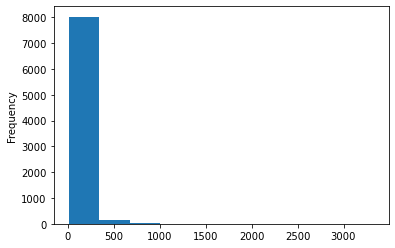

In [135]:
df.price.plot.hist() # histogram

If the code worked properly you should have just created a standard [histogram](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.hist.html#pandas.Series.plot.hist) plot (if you can't see one, ask for help). 

You can also pass in simple options to improve the plotting:

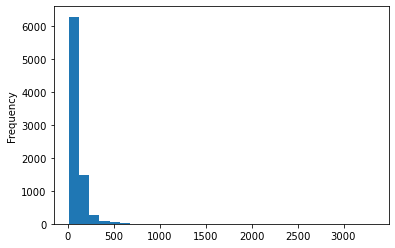

In [141]:
df.price.plot.hist(bins=30) 
# more bins increase the accuracy of each bar, beign able to represent a smaller subset of the distribution

### Task 5.2: KDE Plots

Similarly, we can produce a [Kernel Density Estimate plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html#pandas.Series.plot.kde) (modifying the limits of the x-axis using `xlim`):

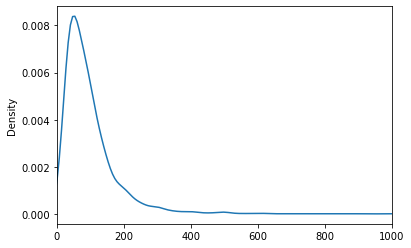

In [143]:
df.price.plot.kde(xlim=(0,1000)) # the part in parens specifies the range of the plot (i.e. here it runs from 0 - 1k USD)

Kind of handy, no? These aren't the _best_ looking plots, but they are all being generated on-the-fly for you by pandas with no more than a cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all just method calls, many of them take optional parameters to change the colour, the notation (scientific or not), and other options. For example, many of the documentation pages linked to above are rather brief, but include a link to [the general options that can be applied to all `Series.plot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot) calls.

This is why we like pandas: it allows us to be _constructively lazy_. We don't need to know _how_ a draw a KDE plot (though it always helps if you don't see what you expected), we just need to know that pandas provides a method that will do it for you. And _that_ is why it's always worth having a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting). 

Generally, Jupyter is clever enough to overlay plots one on top of the other if you call them all in the same cell. We'll see ways to gain more control later, but this is still a good start!

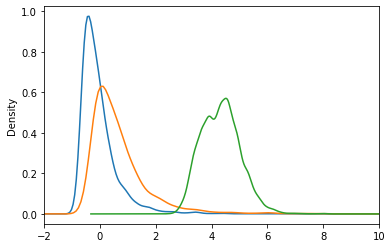

In [145]:
df.z.plot.kde(xlim=[-2, 10])  # plotting the z score 
df.iqs.plot.kde(xlim=[-2, 10])  # plotting the iqs
df.lnprice.plot.kde()  # plotting the log of price 

### Task 5.3: Boxplots

A standard [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.box.html#pandas.Series.plot.box):

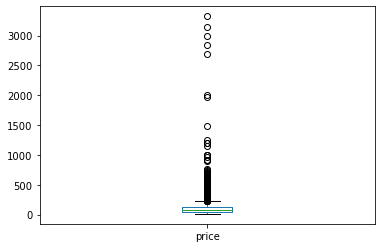

In [147]:
df.price.plot.box() # boxplot

### Task 5.4: Scatterplots

We can also plot two variables in a [scatter plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) by applying a plot method to the `DataFrame` (not an individual `Series`):

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matpl

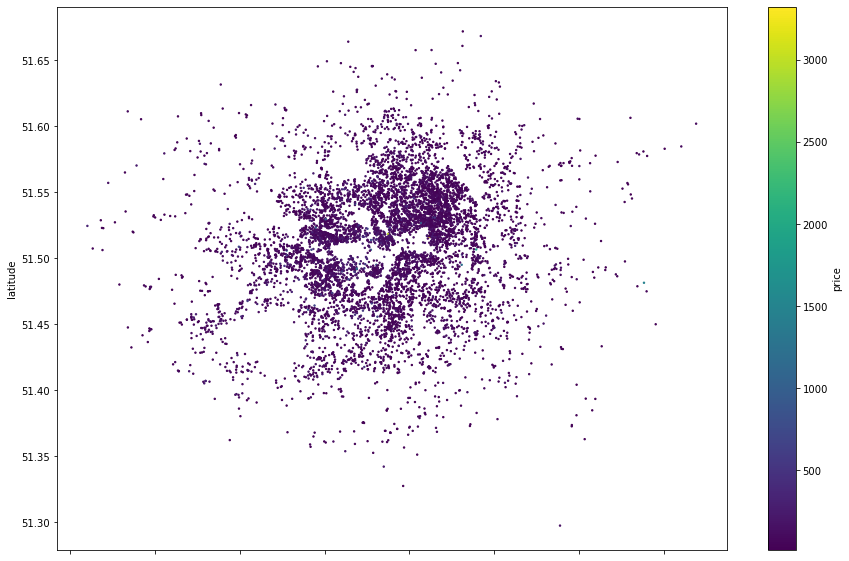

In [148]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))

Note how the code above has the form `DataFrame.plot.<plot type>`, not `DataFrame.Series.plot.<plot type>` as in the prior plots. Think about why this then means we need the `x` and `y` arguments. 

Looking at the plot produced, it's hard to see where the high values are, so we might want to think about ways that we could make it easier to spot the big numbers... We could, for instance, also vary the size of the point in a plot by some variable:

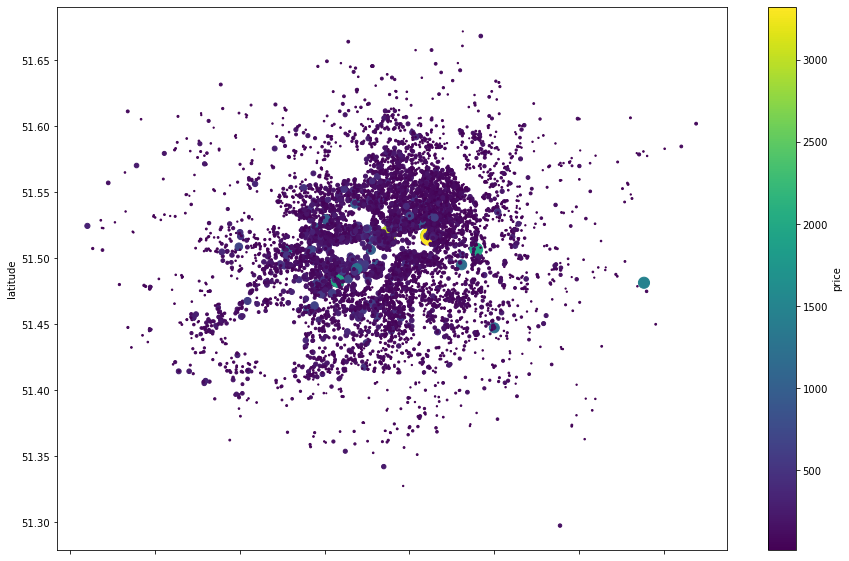

In [149]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=(df.price/df.price.min()), cmap='viridis', figsize=(15,10))

And we can plot subsets of our data without creating a new object. See if you can work out what the following code is doing that is different from the last plot:

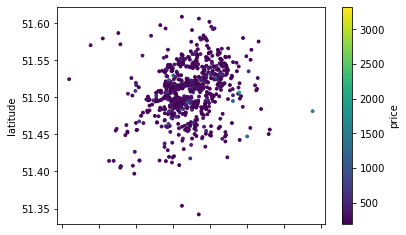

In [150]:
df[df.price > df.price.quantile(0.90)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)

### Task 5.5: Hex Bin Plots

And pandas allows us to create 'less standard' plots, like a [hex bin plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

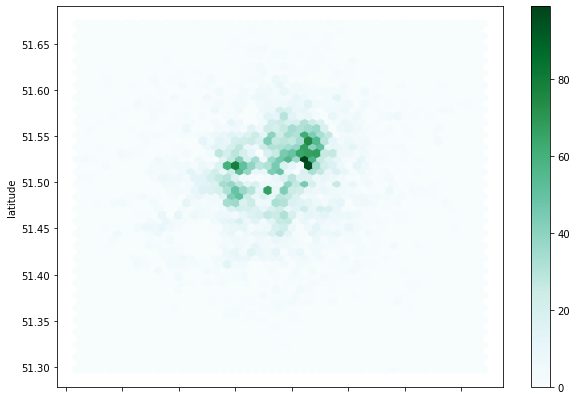

In [151]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))  #hex bin plot

That's just a taste of what the basic plotting functionality of pandas can do. Feel free to explore more yourself and we'll also see [the seaborn package](http://seaborn.pydata.org/index.html) later. 

## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib